In [1]:
import numpy as np
import pandas as pd
import sweetviz as sv

In [2]:
df = pd.read_csv("../data/raw/train.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


                                             |          | [  0%]   00:00 -> (? left)


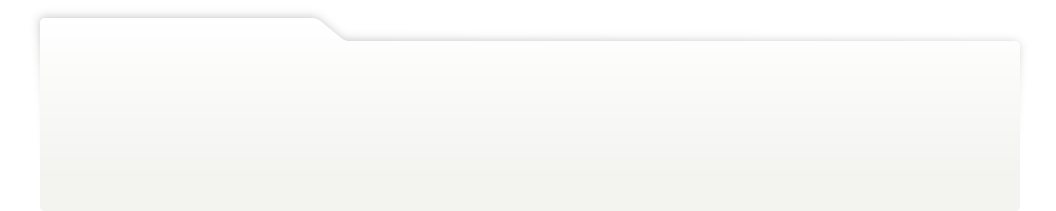
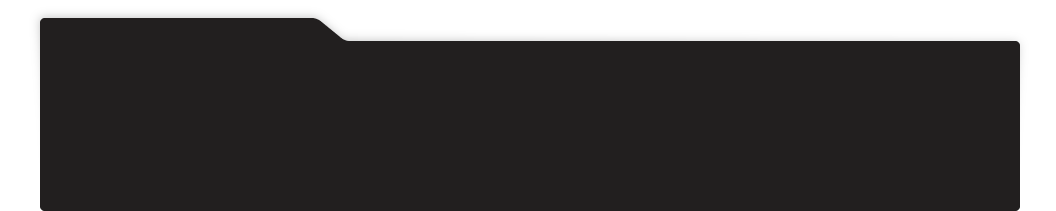
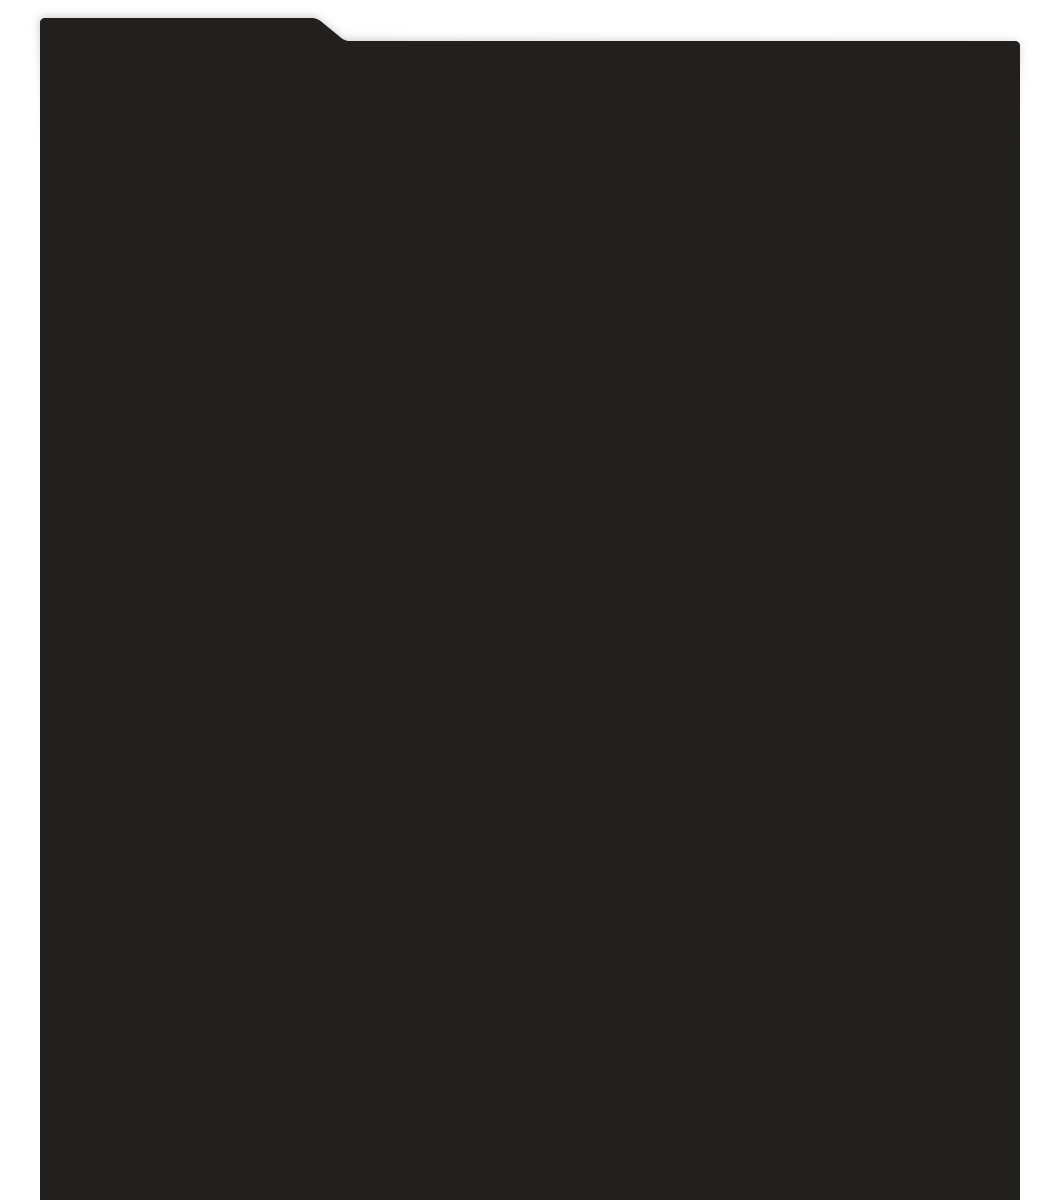
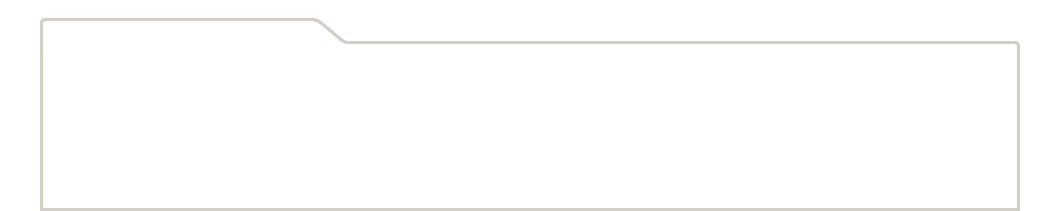
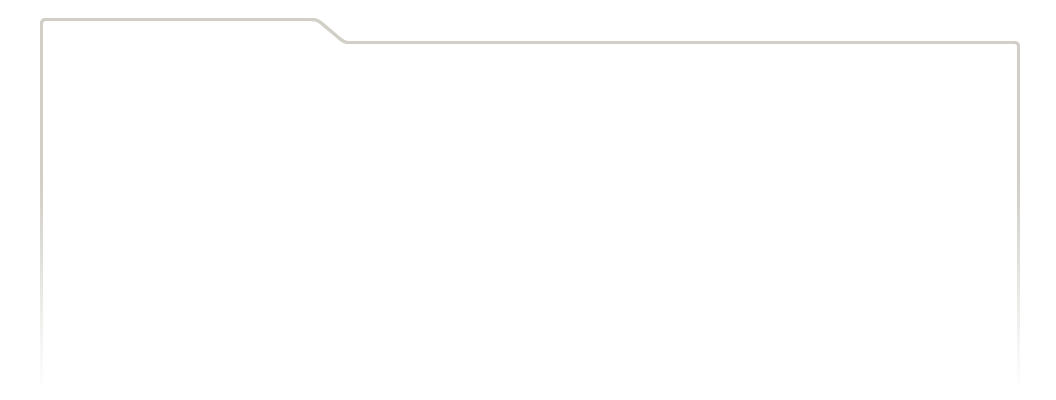
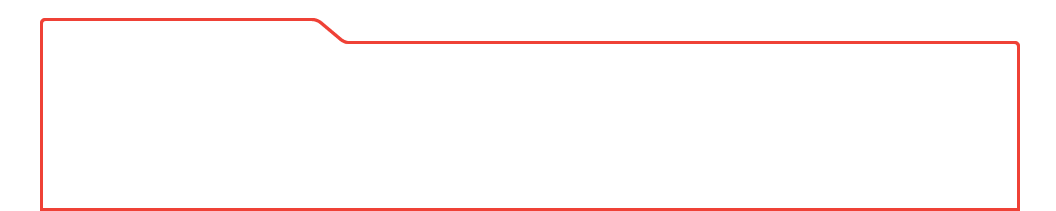
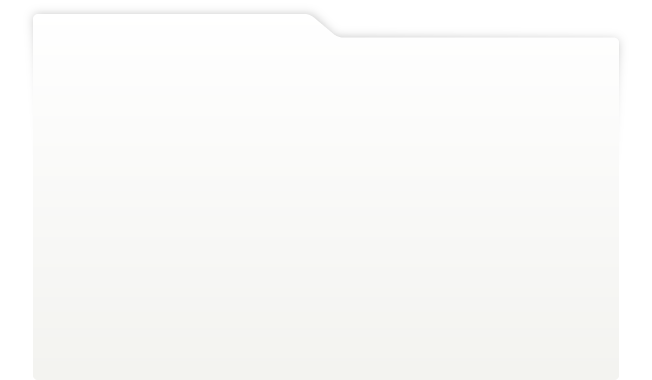
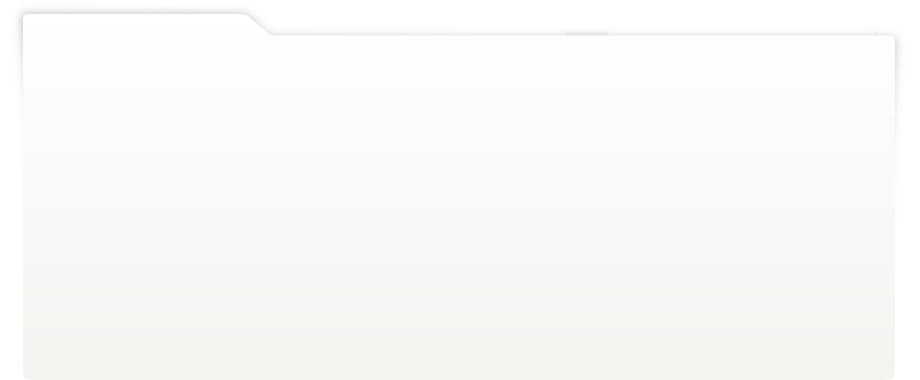
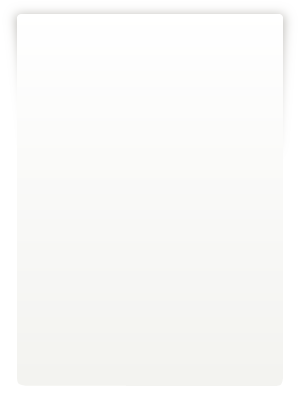
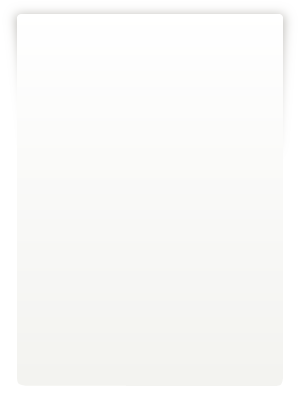
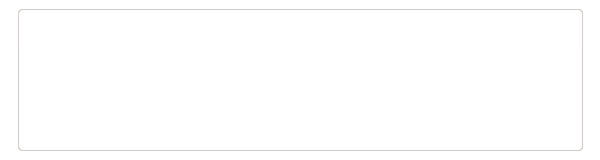
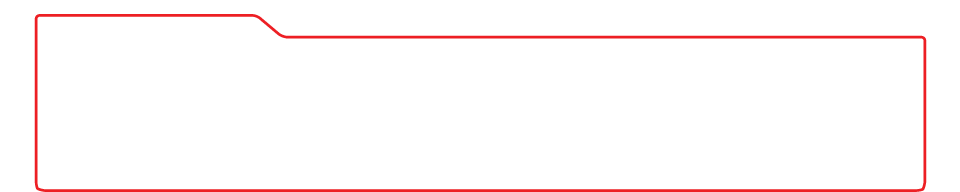
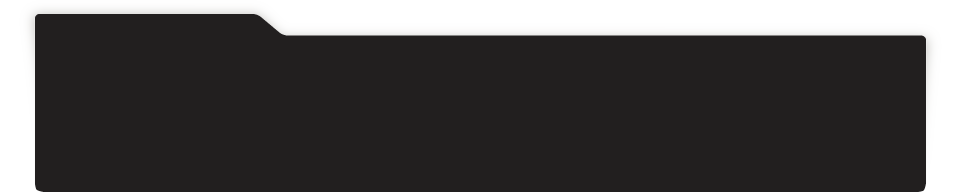
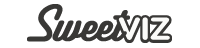
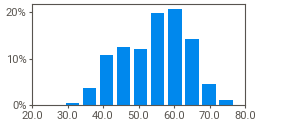
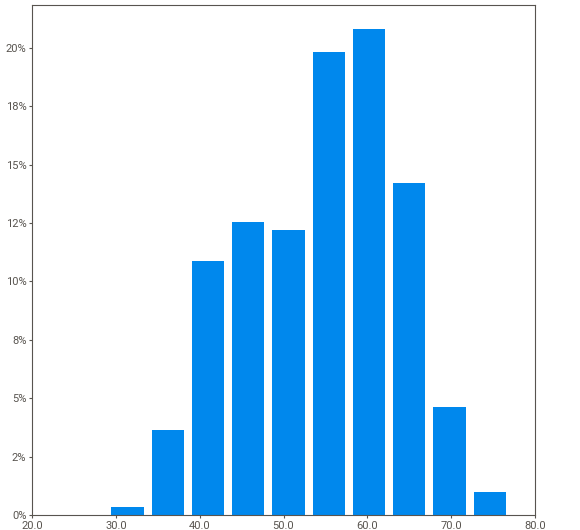
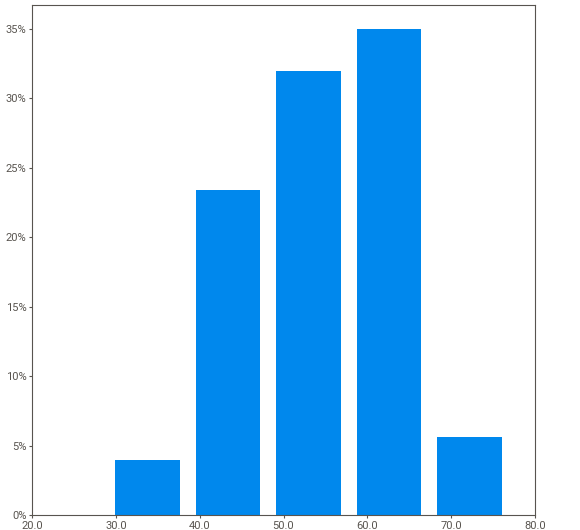
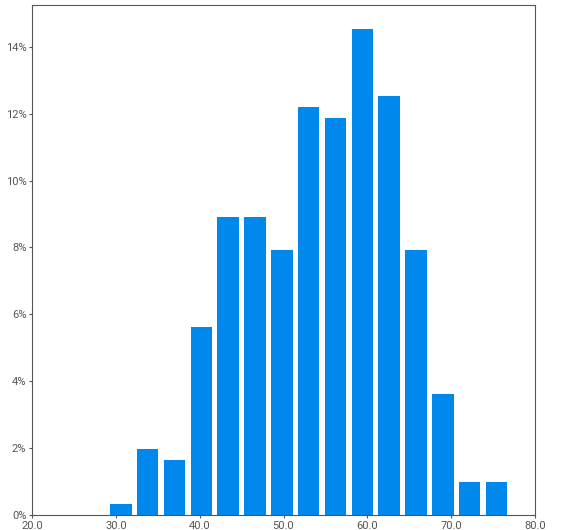
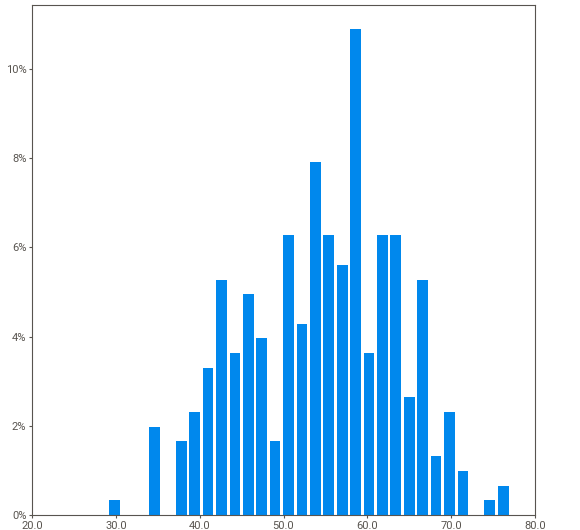
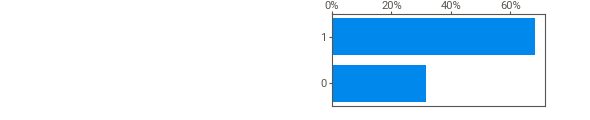
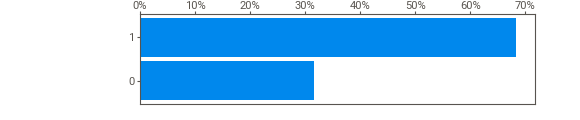
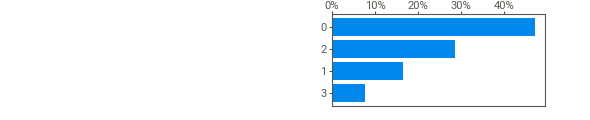
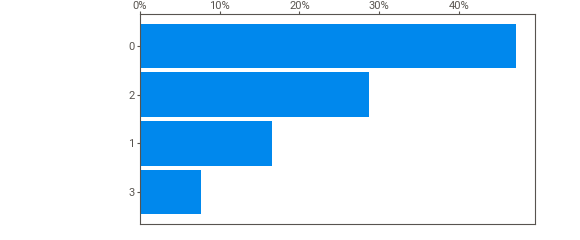
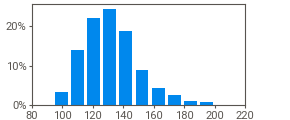
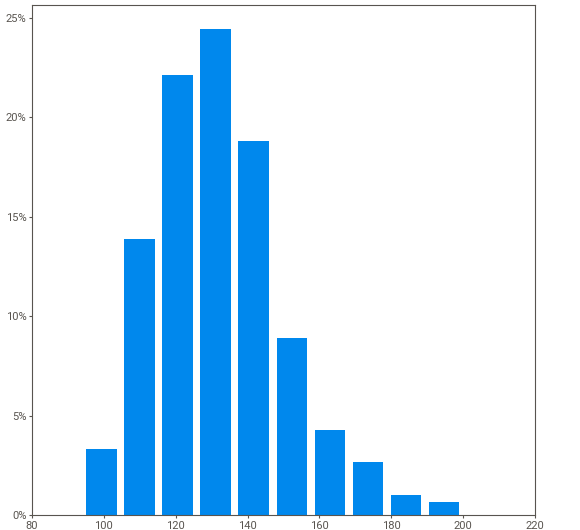
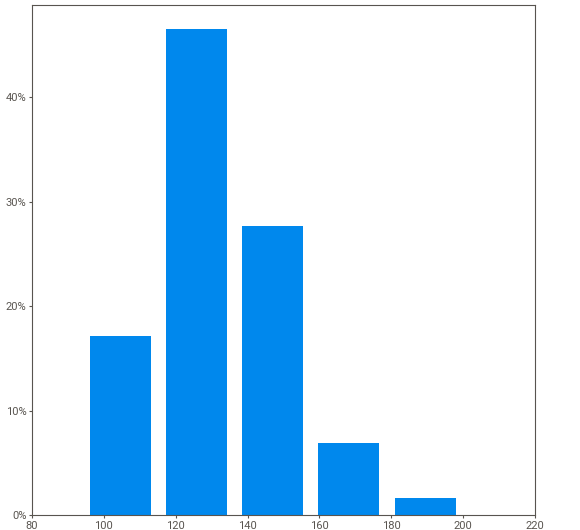
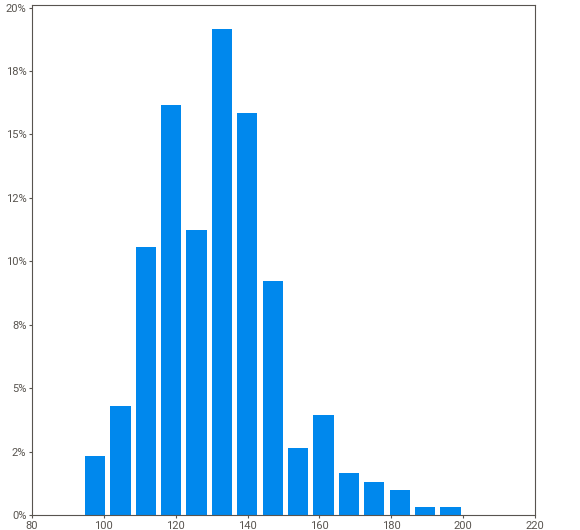
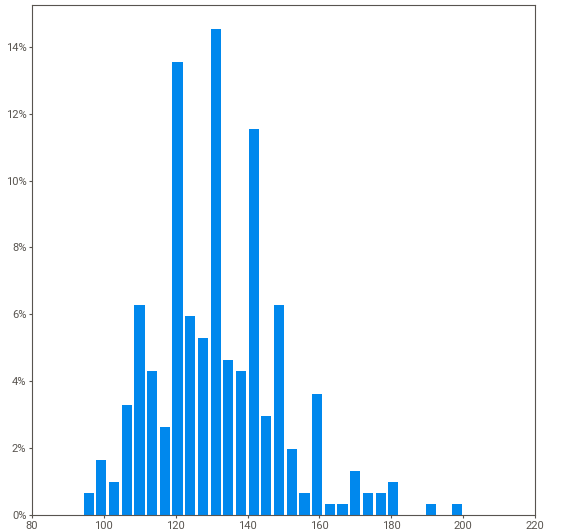
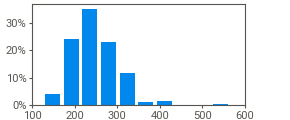
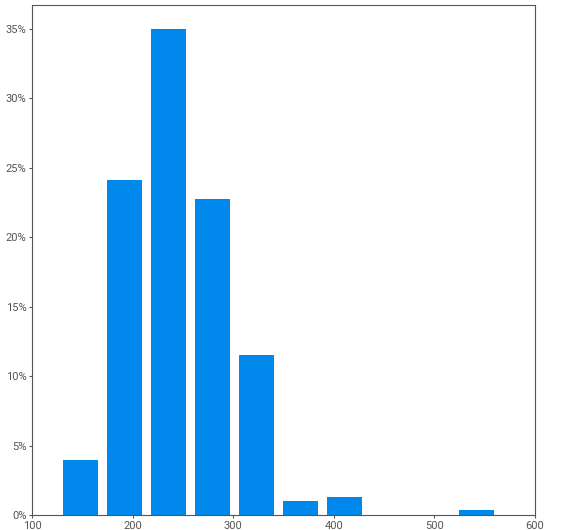
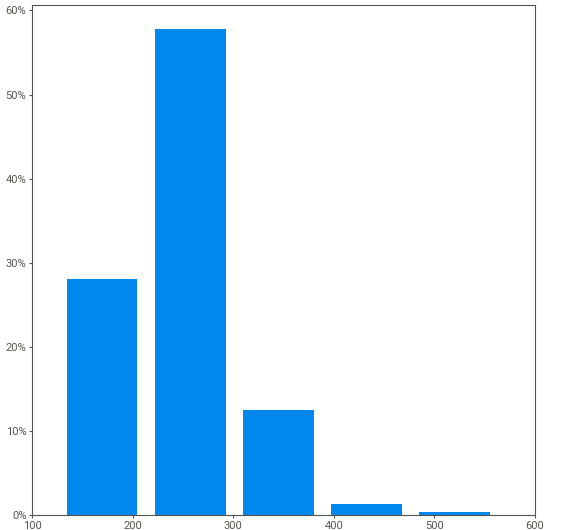
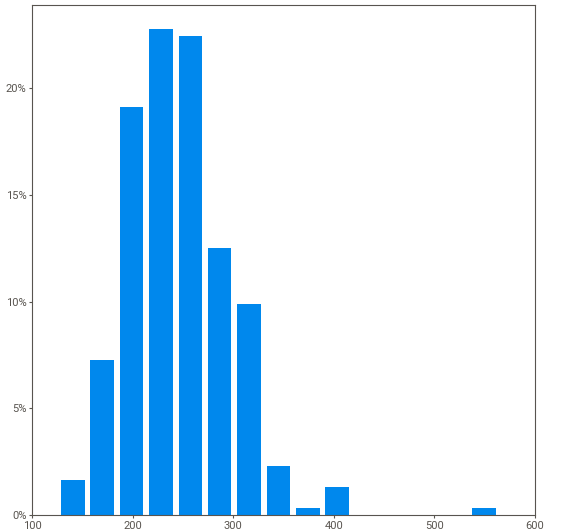
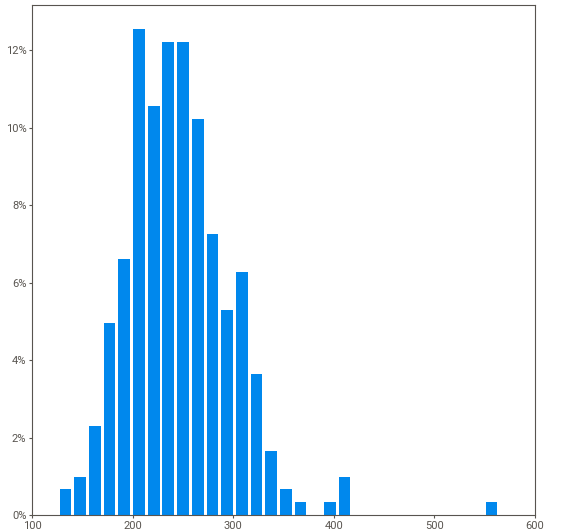
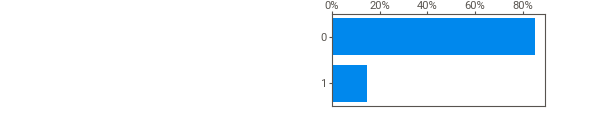
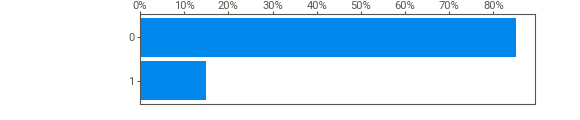
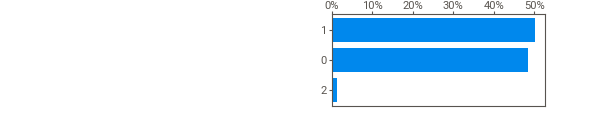
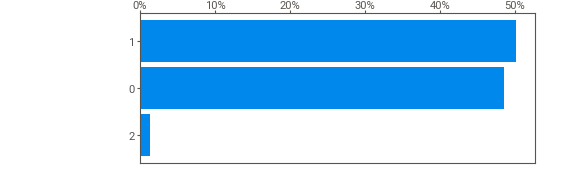
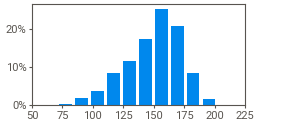
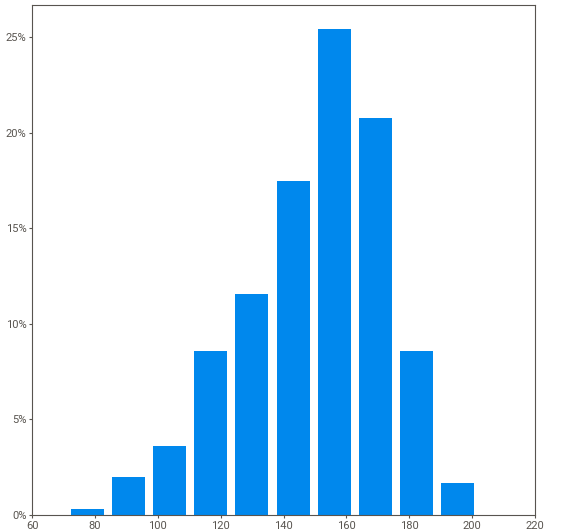
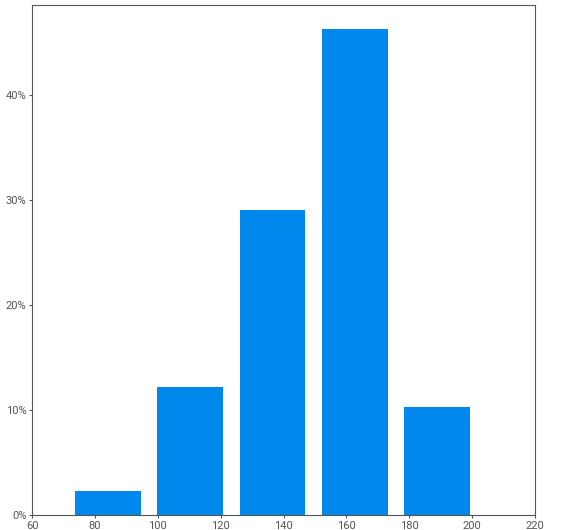
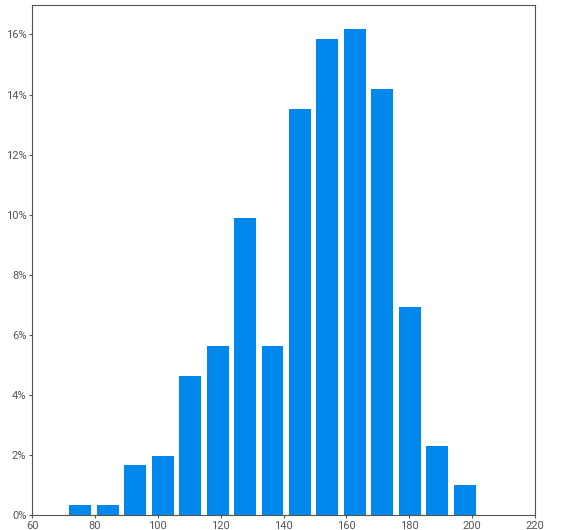
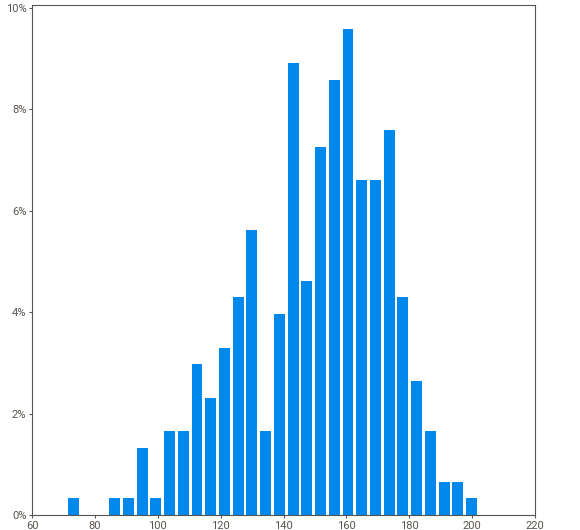
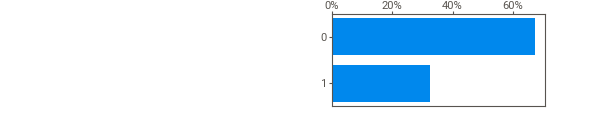
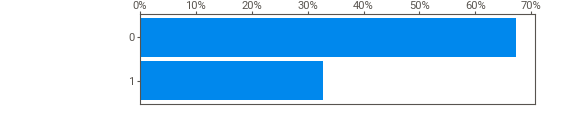
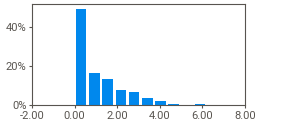
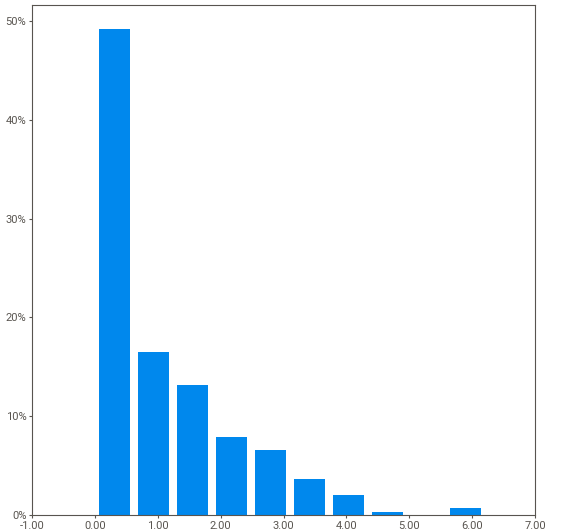
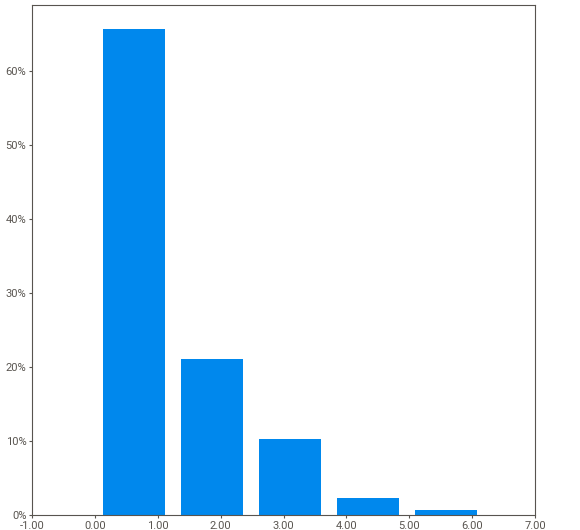
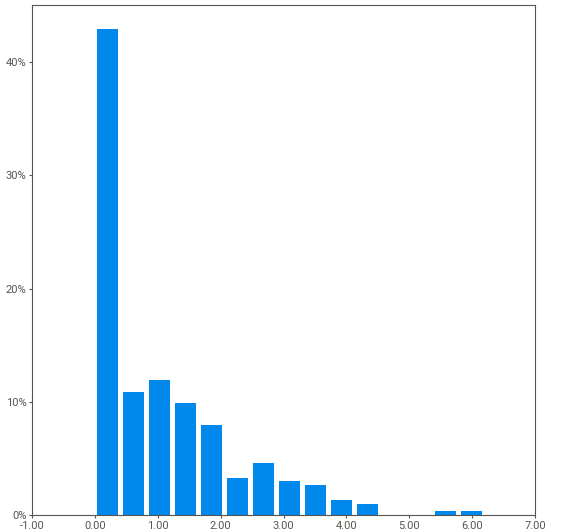
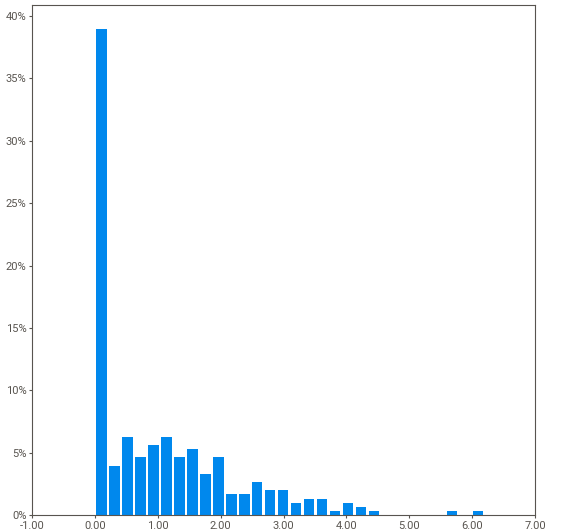
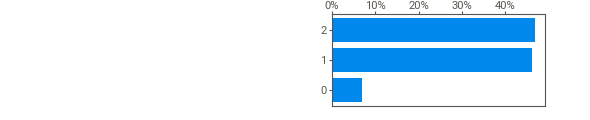
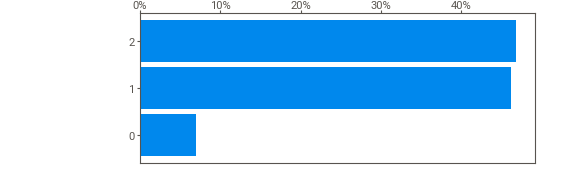
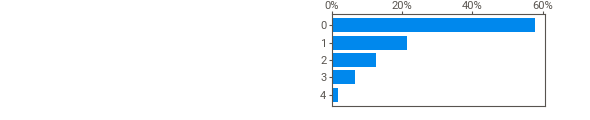
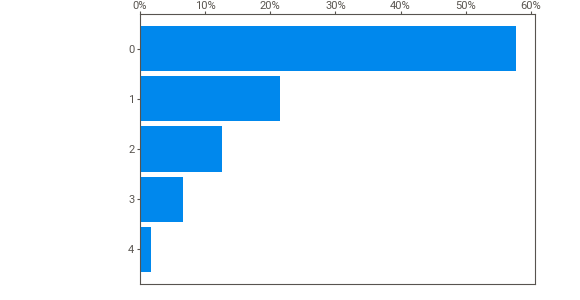
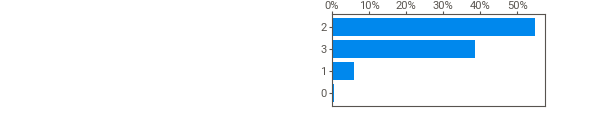
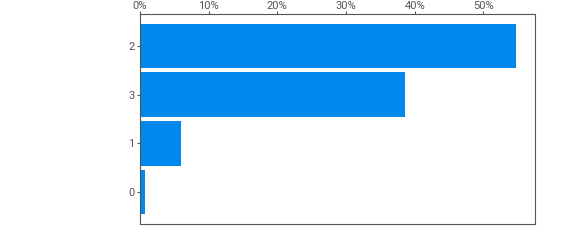
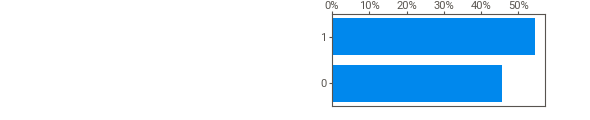
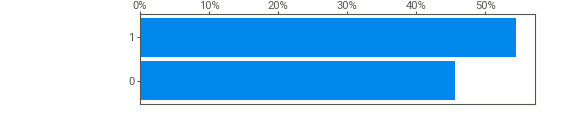
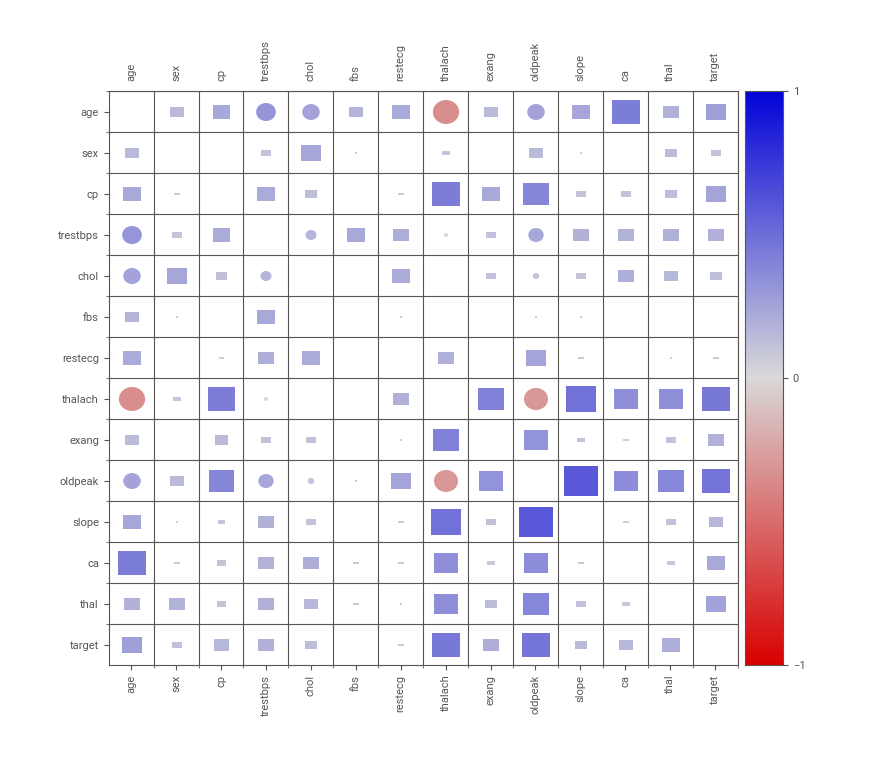
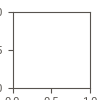

In [4]:
heart_disease_report = sv.analyze(df)
heart_disease_report.show_notebook()

In [64]:
cat_cols = [
    "sex",
    "cp",
    "fbs",
    "restecg",
    "exang",
    "slope",
    "ca",
    "thal",
    "target"
]

num_cols = [
    "age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak",
]

In [113]:
multinomial_params = {}
for col in cat_cols:
    multinomial_params[col] = {k: float(v) for k, v in dict(df.loc[:, col].value_counts() / len(df)).items()}

In [103]:
import yaml

In [114]:
with open('../configs/sample_params.yaml', 'w') as outfile:
    yaml.dump(multinomial_params, outfile, default_flow_style=False)

In [31]:
from scipy.stats import multinomial
import random

In [67]:
def generate_multinomial_samples(params: dict, n: int = 10):
    counts = multinomial.rvs(n=n, p=list(params.values()))
    samples = []
    for idx, val in enumerate(params):
        samples.extend([val for _ in range(counts[idx])])
    random.shuffle(samples)
    return samples

In [54]:
def generate_numerical_samples(df, n: int = 10):
    num_cols = [
        "age",
        "trestbps",
        "chol",
        "thalach",
        "oldpeak",
    ]
    samples = []
    for col in num_cols:
        samples.append(random.choices(df.loc[:, col].values, k = n))
    return samples

In [101]:
def generate_random_samples_from_data(df, cat_cols, num_cols, n=50):
    multinomial_params = {}
    for col in cat_cols:
        multinomial_params[col] = dict(df.loc[:, col].value_counts() / (len(df)))
    cat_samples = [generate_multinomial_samples(params, n = n) for params in multinomial_params.values()]
    num_samples = generate_numerical_samples(df, n = n)
    num_samples.extend(cat_samples)
    return pd.DataFrame(np.array(num_samples).T, columns = num_cols + cat_cols)

In [123]:
generate_random_samples_from_data(df, cat_cols, num_cols, 10)

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,44.0,145.0,175.0,137.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0
1,57.0,150.0,243.0,179.0,2.8,0.0,0.0,1.0,1.0,0.0,2.0,3.0,2.0,0.0
2,69.0,140.0,281.0,157.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
3,54.0,135.0,240.0,158.0,0.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0
4,41.0,128.0,211.0,142.0,3.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,3.0,0.0
5,55.0,138.0,208.0,153.0,1.4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0
6,59.0,130.0,249.0,143.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0
7,43.0,165.0,126.0,168.0,1.2,0.0,2.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0
8,64.0,100.0,304.0,116.0,2.8,1.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0
9,54.0,178.0,244.0,174.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
